# 機械学習スクラッチ　クラスタリング

# 【問題1】中心点の初期値を決める

入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [1]:
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
from operator import itemgetter
np.random.seed(seed = 0)

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [3]:
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

In [93]:
#データ点数の取得
x_nums = X.shape[0]

#μKの初期値を求める
k_nums = 4
start_point = np.random.choice(np.arange(0, x_nums), k_nums)
print(start_point)

[ 1 18 53 28]


# 【問題2】SSEを求める関数の作成

クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
r
n
k
 と 
μ
k
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。



$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$

n
 : データ点のインデックス


k
 : クラスタのインデックス


X
n
 : 
n
番目のデータ点


μ
k
 : 
k
番目の中心点


r
n
k
 : データ点
X
n
がクラスタ
k
に所属していたら1、そうでなければ0

In [99]:
def test_sum_squared_errors(X, k_nums, start_point):
    """
    クラスタ内誤差平方和（SSE）を求める関数
    
    ----
    X: 特徴量Xn＋クラス列（ndarray型）
    k_nums : クラス数（int型)
    start_point : 中心点（ndarray型）
    """
    tmp = []
    for i in range(X.shape[0]):
        for j in range(k_nums):
            if X[i, 2] == j:
                tmp.append(abs(X[i, 0:2] - X[start_point[j], 0:2]) ** 2)

    sse = sum(tmp)

    return sse

In [100]:
test_sum_squared_errors(X, k_nums, start_point)

array([206.13166474,  84.3693348 ])

# 【問題3】クラスタへの割り当て

全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。

$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$

In [96]:

#X0と各基準点との距離
distance = []
for i in range(4):
    distance.append(np.linalg.norm(X[0]-X[start_point[i]]))

print(distance)
print("最小値", min(distance))
print("クラス", distance.index(min(distance)))

[4.995048762002617, 2.6999619952943723, 2.4687232129431433, 2.7944915322518167]
最小値 2.4687232129431433
クラス 2


In [97]:
#X0ともっとも近い基準点のインデックスをクラスタとして割り当てる

#クラスタ列の追加
class_term = np.zeros(X.shape[0]).reshape(X.shape[0],1)
X = np.concatenate([X,class_term], 1)

print(X[0:20])

[[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  0.        ]
 [ 1.35678894  4.36462484  0.        ]
 [ 1.05374379  4.49286859  0.        ]
 [ 1.59141542  4.90497725  0.        ]
 [ 0.78260667  4.15263595  0.        ]
 [-1.95751686  3.87291474  0.        ]
 [-0.77354537  7.87923564  0.        ]
 [ 0.12313498  5.27917503  0.        ]
 [-1.43284669  7.71577043  0.        ]
 [-0.92819001  7.02698199  0.        ]
 [-1.74836345  7.06307447  0.        ]
 [-1.26789718  7.25141327  0.        ]
 [-0.98661744  7.74968685  0.        ]
 [-0.81984047  7.50994722  0.        ]
 [ 2.99684287  0.22378413  0.        ]
 [ 1.46870582  1.86947425  0.        ]
 [-0.33533163  3.390122    0.        ]
 [-1.86407034  2.93379754  0.        ]
 [ 2.62496786  0.28025075  0.        ]]


In [98]:
#距離を計算して最小クラスを割り当て

for i in range(x_nums):
    distance = []
    for j in range(k_nums):
        distance.append(np.linalg.norm(X[i]-X[start_point[j]]))
    X[i, 2] = distance.index(min(distance))

# 【問題4】中心点の移動

中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [101]:
k_point = np.empty((k_nums, X.shape[1]-1))

for i in range(k_nums):
    k_point[i] = np.mean(X[np.where(X[:, 2] == i)], axis=0)[0:2]

print(k_point)

[[-1.26811733  7.76378266]
 [-0.56770024  3.46144036]
 [-0.21391609  3.93936165]
 [ 1.95914562  1.32094551]]


# 【問題5】繰り返し

クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 
μ
k
 と重心の差が指定した許容値以下になる。（雛形では引数tol

# 【問題6】異なる初期値で計算

問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
μ
k
 を保持しておきます。

In [105]:
class ScratchKMeans:
    def __init__(self, n_clusters, n_init, max_iter=100, tol=1e-04, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        # 各リストの初期化
        self.sse_ = []  # SSE
        self.start_point = []
        self.gravity_points_ = []
        self.best_point_ = []
        self.silhouette_ = []

    def fit(self, X):
        # データ点数の取得
        x_nums = X.shape[0]

        # μKの初期値を求める
        k_nums = self.n_clusters
        k_point = np.empty((k_nums, X.shape[1]))  # K点空のリスト

        # クラスタ列の追加
        class_term = np.zeros(X.shape[0]).reshape(X.shape[0], 1)
        X = np.concatenate([X, class_term], 1)

        # 開始位置の初期化
        for k in range(self.n_init):
            start_point = np.random.choice(np.arange(0, x_nums), k_nums)  # 初期点インデックス
            self.start_point.append(start_point)  # 開始点保存
            for i in range(k_nums):
                k_point[i] = X[start_point[i], 0:2]  # 初期点インデックスのデータを格納

            # 繰り返し処理（収束）
            for _ in range(self.max_iter):

                # 所属クラスの更新
                for i in range(x_nums):
                    distance = []
                    for j in range(k_nums):
                        distance.append(np.linalg.norm(X[i, 0:2] - k_point[j]))
                    X[i, -1] = distance.index(min(distance))

                    """異なる実装
                    np.array([np.array([ 距離のスカラー（xで計算する） for 重心 in 重心リスト]).argmin() for x in X])
                    """
                k_old = np.copy(k_point)

                for i in range(k_nums):
                    k_point[i] = np.mean(X[np.where(X[:, 2] == i)], axis=0)[0:2]

                if np.linalg.norm(k_old[0] - k_point[0]) <= self.tol:
                    break

                # print(self.sum_squared_errors(X, k_point))

            # SSEの計算
            self.sse_.append(self.sum_squared_errors(X, k_point))

            # 重心の保存
            self.gravity_points_.append(k_point)

        # 最もスコアの良い重心ポイントの保存
        self.best_point_ = self.gravity_points_[self.sse_.index(min(self.sse_))]
                                                
        if self.verbose:
            # verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X, fullsize=False):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        # データ点数の取得
        x_nums = X.shape[0]

        # クラスタ列の追加
        class_term = np.zeros(X.shape[0]).reshape(X.shape[0], 1)
        X = np.concatenate([X, class_term], 1)

        # 所属クラスの更新
        for i in range(x_nums):
            distance = []
            for j in range(k_nums):
                distance.append(np.linalg.norm(X[i, 0:2] - self.best_point_[j]))
            X[i, -1] = distance.index(min(distance))

        if fullsize:
            y = X
        else:
            y = X[:, -1]

        return y

    def sum_squared_errors(self, X, k_point):
        """
        クラスタ内誤差平方和（SSE）を求める関数

        ----
        X: 特徴量Xn＋クラス列（ndarray型）
        k_nums : クラス数（int型)
        k_point : 中心点（ndarray型）
        """
        k_nums = self.n_clusters
        tmp = []
        for i in range(X.shape[0]):
            for j in range(k_nums):
                if X[i, 2] == j:
                    tmp.append((np.linalg.norm(X[i, 0:2] - k_point[j])) ** 2)

        sse = sum(tmp)

        return sse

In [106]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

Kmeans = ScratchKMeans(n_clusters=5, n_init=4, max_iter=100)
Kmeans.fit(X)

In [107]:
Kmeans.sse_

[44.49341089386893, 43.84455605614975, 44.427326278252124, 43.40818720213042]

In [108]:
Kmeans.start_point

[array([64, 85, 88, 73,  8]),
 array([82, 11, 92, 51, 81]),
 array([55, 15,  3, 88, 85]),
 array([28, 58, 85, 78, 65])]

In [109]:
#重心リスト
Kmeans.gravity_points_

[array([[ 0.92578447,  4.32475792],
        [ 1.83444324,  1.37568656],
        [-1.47935679,  3.11716896],
        [ 2.16241364,  0.52136187],
        [-1.26811733,  7.76378266]]), array([[ 0.92578447,  4.32475792],
        [ 1.83444324,  1.37568656],
        [-1.47935679,  3.11716896],
        [ 2.16241364,  0.52136187],
        [-1.26811733,  7.76378266]]), array([[ 0.92578447,  4.32475792],
        [ 1.83444324,  1.37568656],
        [-1.47935679,  3.11716896],
        [ 2.16241364,  0.52136187],
        [-1.26811733,  7.76378266]]), array([[ 0.92578447,  4.32475792],
        [ 1.83444324,  1.37568656],
        [-1.47935679,  3.11716896],
        [ 2.16241364,  0.52136187],
        [-1.26811733,  7.76378266]])]

# 【問題7】推定

新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。

具体的には次のことです。


データ点 
X
n
 を最も近い 
μ
k
 に割り当てる。

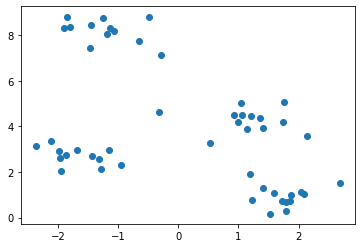

In [110]:
X_test, _ = make_blobs(n_samples=50, n_features=2, centers=4, cluster_std=0.51, shuffle=True, random_state=0)

plt.scatter(X_test[:, 0],X_test[:, 1])
plt.show()

In [111]:
Xy_pred = Kmeans.predict(X_test, fullsize=True)
y_pred = Kmeans.predict(X_test)

In [112]:
print(y_pred)

[0. 2. 0. 0. 0. 1. 0. 0. 2. 2. 0. 1. 3. 2. 3. 0. 0. 0. 0. 1. 2. 1. 1. 0.
 0. 3. 2. 2. 2. 0. 1. 0. 0. 2. 1. 0. 3. 2. 0. 0. 0. 3. 0. 0. 1. 0. 2. 0.
 2. 0.]


# 【問題８】エルボー法の実装

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


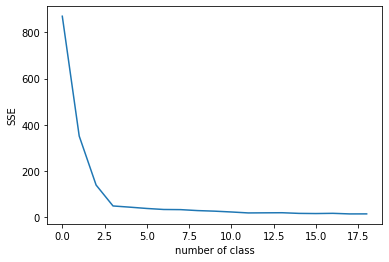

In [113]:
elbow = []

for i in range(1,20):
    Kmeans = ScratchKMeans(n_clusters=i, n_init=10, max_iter=100)
    Kmeans.fit(X)
    elbow.append(min(Kmeans.sse_))

plt.ylabel("SSE")
plt.xlabel("number of class")
plt.plot(elbow)
plt.show()